<font size="+3"><strong>Wine Quality Prediction</strong></font>

In [ ]:
__author__ = "Donald Ghazi"
__email__ = "donald@donaldghazi.com"
__website__ = "donaldghazi.com"

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from sklearn.datasets import make_blobs
from sklearn import linear_model, datasets, metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")
df = df.ix[:,1:14]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5.8,0.555,0.26,4.50,0.053,17.0,126.0,0.99430,3.24,0.46,9.1,0.5,0.0
1,6.3,0.360,0.19,3.20,0.075,15.0,39.0,0.99560,3.56,0.52,12.7,0.6,1.0
2,6.4,0.210,0.50,11.60,0.042,45.0,153.0,0.99720,3.15,0.43,8.8,0.5,0.0
3,6.6,0.330,0.24,16.05,0.045,31.0,147.0,0.99822,3.08,0.52,9.2,0.5,0.0
4,6.4,0.230,0.33,1.15,0.044,15.5,217.5,0.99200,3.33,0.44,11.0,0.6,0.0
5,7.2,0.510,0.24,10.00,0.093,35.0,197.0,0.99810,3.41,0.47,9.0,0.5,0.0
6,7.1,0.140,0.35,1.40,0.039,24.0,128.0,0.99212,2.97,0.68,10.4,0.5,0.0
7,7.3,0.260,0.53,12.70,0.047,60.5,156.0,0.99840,3.06,0.45,9.1,0.6,0.0
8,5.8,0.540,0.00,1.40,0.033,40.0,107.0,0.98918,3.26,0.35,12.4,0.5,0.0
9,8.7,0.310,0.73,14.35,0.044,27.0,191.0,1.00013,2.96,0.88,8.7,0.5,0.0


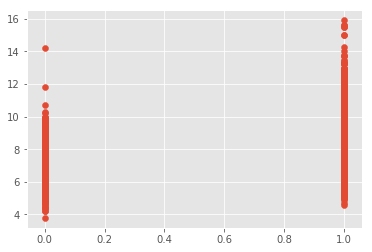

In [3]:
plt.scatter(df['12'],df['0'])
plt.show()

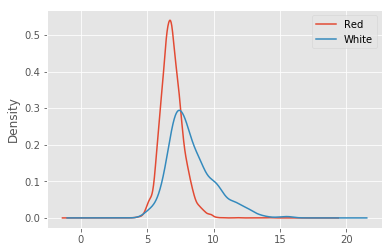

In [4]:
df.groupby('12')['0'].plot(kind='density')
plt.legend(labels=['Red','White'])
plt.show()

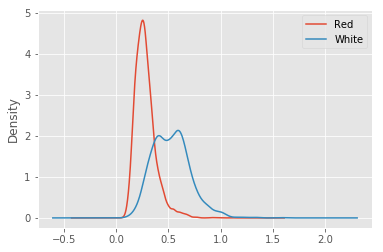

In [5]:
df.groupby('12')['1'].plot(kind='density')
plt.legend(labels=['Red','White'])
plt.show()

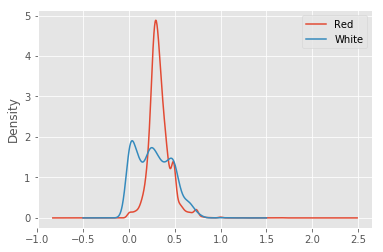

In [6]:
df.groupby('12')['2'].plot(kind='density')
plt.legend(labels=['Red','White'])
plt.show()

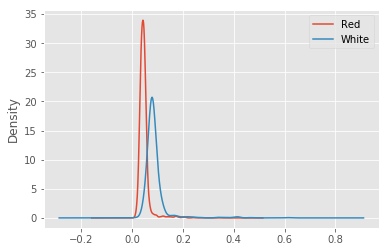

In [7]:
df.groupby('12')['4'].plot(kind='density')
plt.legend(labels=['Red','White'])
plt.show()

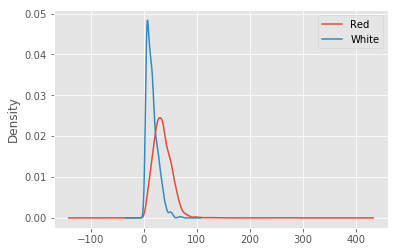

In [8]:
df.groupby('12')['5'].plot(kind='density')
plt.legend(labels=['Red','White'])
plt.show()

In [9]:
labels = df.ix[:,12:13]

In [10]:
features = df.ix[:, 0:12]

training_proportion = (6000 / 100) * 80
training_features = features.ix[:training_proportion]
validation_features = features.ix[training_proportion:]
training_labels = labels.ix[:training_proportion]
validation_labels = labels.ix[training_proportion:]

In [11]:
def modelTraining(training_features, training_labels, validation_features, validation_labels, n, regression_type):
    x = training_features[:n]
    y = training_labels[:n]
    lrm = linear_model.LogisticRegression(penalty=regression_type)
    lrm.fit(x, y)
    
    pred = lrm.predict(validation_features)
    score = metrics.accuracy_score(validation_labels, pred)
    
    return score

In [12]:
sample_points = [100, 200, 500, 1000, 2000, 4800]

L1Scores = []

for x in sample_points:
    L1Scores.append(modelTraining(training_features, 
                                  training_labels, 
                                  validation_features, 
                                  validation_labels,
                                  x,
                                  "l1"))
    
L1Scores

[0.96499999999999997,
 0.97416666666666663,
 0.97583333333333333,
 0.98083333333333333,
 0.98333333333333328,
 0.98750000000000004]

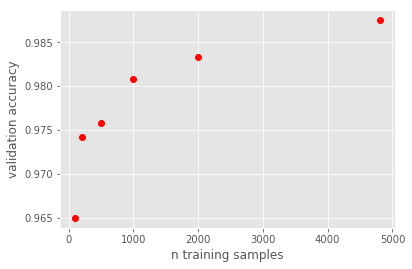

In [13]:
plt.plot(sample_points, L1Scores, 'ro')
plt.xlabel('n training samples')
plt.ylabel('validation accuracy')
plt.show()

In [14]:
L2Scores = []

for x in sample_points:
    L2Scores.append(modelTraining(training_features, 
                                  training_labels, 
                                  validation_features, 
                                  validation_labels,
                                  x,
                                  "l2"))
    
L2Scores

[0.96416666666666662,
 0.96750000000000003,
 0.96999999999999997,
 0.97666666666666668,
 0.98166666666666669,
 0.98499999999999999]

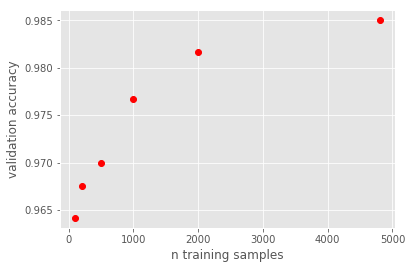

In [15]:
plt.plot(sample_points, L2Scores, 'ro')
plt.xlabel('n training samples')
plt.ylabel('validation accuracy')
plt.show()

L1 performed better than L2, as can be seen by the higher validation accuracy in the first graph for all data points

In [16]:
test = pd.read_csv("./test.csv")
test = test.ix[:,1:14]
test_features = test.ix[:, 0:12]

lrm2 = linear_model.LogisticRegression(penalty='l1')
lrm2.fit(features, labels)
results = lrm2.predict(test)

np.savetxt("./submission.csv", results, delimiter=',')